In [ ]:
RECOMMENDATION SYSYTEM(GeeksForGeeks)

In [ ]:
IT AIMS TO PREDICT'S USER INTEREST AND RECOMMEND ITEM OR THEM
ALMOST ALL THE TECH BASED COMPANIES USED THEM IN ONE OR THE ANOTHER WAY

In [ ]:
Recommender systems produce a list of recommendations in any of the two ways

In [ ]:
(A)Collaborative filtering:-It built a model based on user's past behaviour(item that user purchased or searched)
as well as similiar decision made by other users.
(b)Contet-based filtering:=an item in order to recommend additional items with similar properties. 

In [ ]:
Let’s develop a basic recommendation system using Python and Pandas
 in this case, movies. It just tells what movies/items are most similar to the user’s movie choice.

In [3]:
import pandas as pd

In [4]:
column_names =["user_id","item_id","rating","timestamp"]
ddf = pd.read_csv('C:/Users/DELL/Desktop/tsv.csv', names = column_names)
ddf.head(3)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [5]:
movie_titles =pd.read_csv('C:/Users/DELL/Desktop/Movie_Id_Titles.csv')
movie_titles.head(3)                        

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [6]:
data = pd.merge(ddf,movie_titles,on='item_id')
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [ ]:
CALCULATING THE MEAN RATING OF ALL THE MOVIES

In [11]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [ ]:
We have calculated here each movie title and their count of ratings

In [27]:
 data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [ ]:
# Now we create separate dataframe containg movie title and their average rating and count of rating
# so first create dataframe with movie title and their average rating

In [11]:
new_df_with_avgRating_countRating = pd.DataFrame(data.groupby('title')['rating'].mean())
new_df_with_avgRating_countRating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
Now adding column in above dataframe for rating count for each title

In [12]:
new_df_with_avgRating_countRating['Number of Ratings']= pd.DataFrame(data.groupby('title')['rating'].count())
new_df_with_avgRating_countRating.head()  

,rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [ ]:
NOW WE ARE CONVERTING 'rating' column name to 'AvgRating'

In [13]:
new_df_with_avgRating_countRating.rename(columns=  {'rating':'AvgRatings'}, inplace=True)

In [14]:
new_df_with_avgRating_countRating.head()

,AvgRatings,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [15]:
movie_data = pd.read_csv('C:/Users/DELL/Desktop/imdb_movies_List.csv')
movie_data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


In [8]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
Number of Null Values in each column of a dataframe

In [16]:
df_with_null_column = movie_data.isnull().sum()
df_with_null_column

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
Percentage Null values in each column of a dataframe(movie_data)

In [16]:
movie_data.isnull().sum()*100/len(movie_data)

Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [ ]:
SHOW ONLY COLUMN NAME WITH NULL VALUES

In [17]:
OnlyColumnWithNullValues = df_with_null_column[ df_with_null_column>0].keys()
OnlyColumnWithNullValues

Index(['Certificate', 'Meta_score', 'Gross'], dtype='object')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'counts')

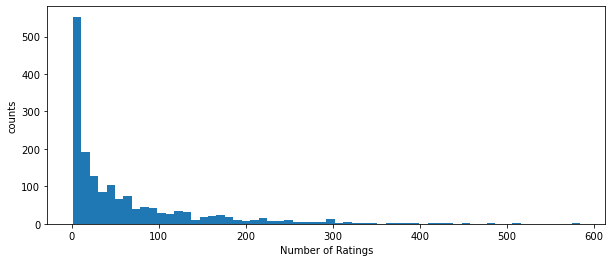

In [49]:
plt.figure(figsize =(10,4))
plt.hist(new_df_with_avgRating_countRating['Number of Ratings'], bins=60)
plt.xlabel('Number of Ratings')
plt.ylabel('counts')

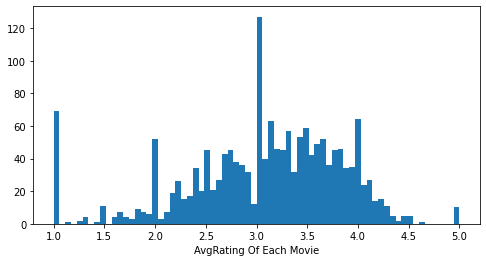

In [51]:
plt.figure(figsize = (8,4))
plt.hist(new_df_with_avgRating_countRating['AvgRatings'], bins=70)
plt.xlabel('AvgRating Of Each Movie')
plt.show()

In [ ]:
# Sorting values according to 
# the 'number of rating column'

In [18]:
moviefile = data.pivot_table(index='user_id', columns='title', values='rating')
moviefile.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Supose, WE WANT TO SEE 'Star Wars(1977) ' ratings by All users
and 'Liar Liar(1997)' rating by all users

In [26]:
starWars_user_rating = moviefile['Star Wars (1977)']
starWars_user_rating.head(8)

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
Name: Star Wars (1977), dtype: float64

In [27]:
liar_liar_user_rating = moviefile['Liar Liar (1997)']
liar_liar_user_rating.head(10)

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
5    NaN
6    2.0
7    1.0
8    3.0
9    4.0
Name: Liar Liar (1997), dtype: float64

In [39]:
yousocrazy_user_ratings = moviefile['You So Crazy (1994)']
yousocrazy_user_ratings.head(10)


user_id
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: You So Crazy (1994), dtype: float64

In [ ]:
Analysing correlations with similiar movies

In [41]:
similiar_to_starWars =moviefile.corrwith(starWars_user_rating)
similiar_to_starWars

C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\DELL\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [ ]:
CREATING DATAFRAME FOR similiar_to_starWars

In [43]:
corelation_starwars = pd.DataFrame(similiar_to_starwars, columns=['Correlation'])
corelation_starwars.dropna(inplace=True)
corelation_starwars.head(9)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [ ]:
NOW SORTING corelation_starwars  dataframe

In [51]:
corelation_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [ ]:
NOW WE ARE JOINING THE ABOVE DATAFRAME corelation_starwars ,WITH new_df_with_avgRating_countRating dataframe's column
and column is Number of Ratings

In [53]:
corelation_starwars =corelation_starwars.join(new_df_with_avgRating_countRating['Number of Ratings'])
corelation_starwars.head(8)

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259


In [ ]:
AGAIN SORTING corelation_starwars by Correlation column

In [54]:
corelation_starwars.sort_values('Correlation', ascending=False).head(9)

,Correlation,Number of Ratings
title,,
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
"Beans of Egypt, Maine, The (1994)",1.0,2
"Good Man in Africa, A (1994)",1.0,2
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0,5


In [ ]:
NOW WE WANT TO FILTER corelation_starwars DATAFRAME for rating greater than 100 and then sort it

In [57]:
corelation_starwars[corelation_starwars['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [48]:
similiar_to_liarliar = moviefile.corrwith(liar_liar_user_rating)
similiar_to_liarliar.head(9)

title
'Til There Was You (1997)                      0.118913
1-900 (1994)                                        NaN
101 Dalmatians (1996)                          0.469765
12 Angry Men (1957)                            0.066272
187 (1997)                                     0.175145
2 Days in the Valley (1996)                    0.040739
20,000 Leagues Under the Sea (1954)           -0.027932
2001: A Space Odyssey (1968)                  -0.057864
3 Ninjas: High Noon At Mega Mountain (1998)         NaN
dtype: float64

In [ ]:
NOW CREATING DATAFRAME FOR similiar_to_liarliar

In [49]:
corealtion_liarliar_df =pd.DataFrame(similiar_to_liarliar)
corealtion_liarliar_df.head(9)

,0
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [ ]:
AGAIN PROVIDNG COLUMN NAME

In [50]:
corealtion_liarliar_df =pd.DataFrame(similiar_to_liarliar, columns=['Correlation'])
corealtion_liarliar_df.dropna(inplace=True)
corealtion_liarliar_df.head(8)

,Correlation
title,
'Til There Was You (1997),0.118913
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
2 Days in the Valley (1996),0.040739
"20,000 Leagues Under the Sea (1954)",-0.027932
2001: A Space Odyssey (1968),-0.057864
"39 Steps, The (1935)",0.400918


In [ ]:
NOW SORTING corealtion_liarliar_df dataframe

In [58]:
corealtion_liarliar_df.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
Mina Tannenbaum (1994),1.0
"Stranger, The (1994)",1.0
"Wooden Man's Bride, The (Wu Kui) (1994)",1.0
Legal Deceit (1997),1.0


In [ ]:
NOW WE ARE JOINING THE ABOVE DATAFRAME corealtion_liarliar_df ,WITH new_df_with_avgRating_countRating dataframe's column
and column is Number of Ratings

In [59]:
corealtion_liarliar_df =corealtion_liarliar_df.join(new_df_with_avgRating_countRating['Number of Ratings'])
corealtion_liarliar_df.head(8)

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.118913,9
101 Dalmatians (1996),0.469765,109
12 Angry Men (1957),0.066272,125
187 (1997),0.175145,41
2 Days in the Valley (1996),0.040739,93
"20,000 Leagues Under the Sea (1954)",-0.027932,72
2001: A Space Odyssey (1968),-0.057864,259
"39 Steps, The (1935)",0.400918,59


In [ ]:
NOW WE WANT TO FILTER corealtion_liarliar_df  DATAFRAME for rating greater than 100 and then sort it

In [61]:
corealtion_liarliar_df[corealtion_liarliar_df['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


In [19]:
new_df_with_avgRating_countRating

,AvgRatings,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [ ]:
NOW SORING DATAFRAME new_df_with_avgRating_countRating

In [22]:
new_df_with_avgRating_countRating.sort_values('Number of Ratings', ascending=False).head(10)

,AvgRatings,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431
